# Q1. Supervising machine learning- classification model

# 1. Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. EDA

In [2]:
df = pd.read_csv('ev_dataset.csv')

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


In [4]:
df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
124711,5YJ3E1EB6N,Snohomish,Monroe,WA,98272.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,39.0,192999061,POINT (-121.98087 47.8526),PUGET SOUND ENERGY INC,5.306105e+10
124712,KNDCM3LD2L,Pierce,Tacoma,WA,98406.0,2020,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,27.0,113346250,POINT (-122.52054 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
124713,7SAYGDEE0P,Whatcom,Bellingham,WA,98226.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,42.0,232751305,POINT (-122.49756 48.7999),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
124714,1G1FW6S03J,Pierce,Tacoma,WA,98444.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,29.0,102589007,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
124715,1G1RC6E47F,Benton,Benton City,WA,99320.0,2015,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,16.0,476974718,POINT (-119.48756 46.26543),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF B...,5.300501e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124716 entries, 0 to 124715
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         124716 non-null  object 
 1   County                                             124714 non-null  object 
 2   City                                               124714 non-null  object 
 3   State                                              124716 non-null  object 
 4   Postal Code                                        124714 non-null  float64
 5   Model Year                                         124716 non-null  int64  
 6   Make                                               124716 non-null  object 
 7   Model                                              124535 non-null  object 
 8   Electric Vehicle Type                              124716 non-null  object

In [6]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,124714.000000,124716.000000,124716.000000,124716.000000,124419.000000,1.247160e+05,1.247140e+05
mean,98163.826740,2019.406339,79.471936,1556.068909,29.664481,2.040790e+08,5.297079e+10
std,2550.122515,2.976174,100.331969,10053.289929,14.749518,8.882569e+07,1.652363e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.541015e+08,5.303301e+10
50%,98121.000000,2020.000000,25.000000,0.000000,34.000000,1.995558e+08,5.303303e+10
75%,98370.000000,2022.000000,200.000000,0.000000,43.000000,2.275165e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [7]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 2
City                                                   2
State                                                  0
Postal Code                                            2
Model Year                                             0
Make                                                   0
Model                                                181
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 297
DOL Vehicle ID                                         0
Vehicle Location                                      29
Electric Utility                                     473
2020 Census Tract                                      2
dtype: int64

array([[<AxesSubplot:title={'center':'Postal Code'}>,
        <AxesSubplot:title={'center':'Model Year'}>,
        <AxesSubplot:title={'center':'Electric Range'}>],
       [<AxesSubplot:title={'center':'Base MSRP'}>,
        <AxesSubplot:title={'center':'Legislative District'}>,
        <AxesSubplot:title={'center':'DOL Vehicle ID'}>],
       [<AxesSubplot:title={'center':'2020 Census Tract'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

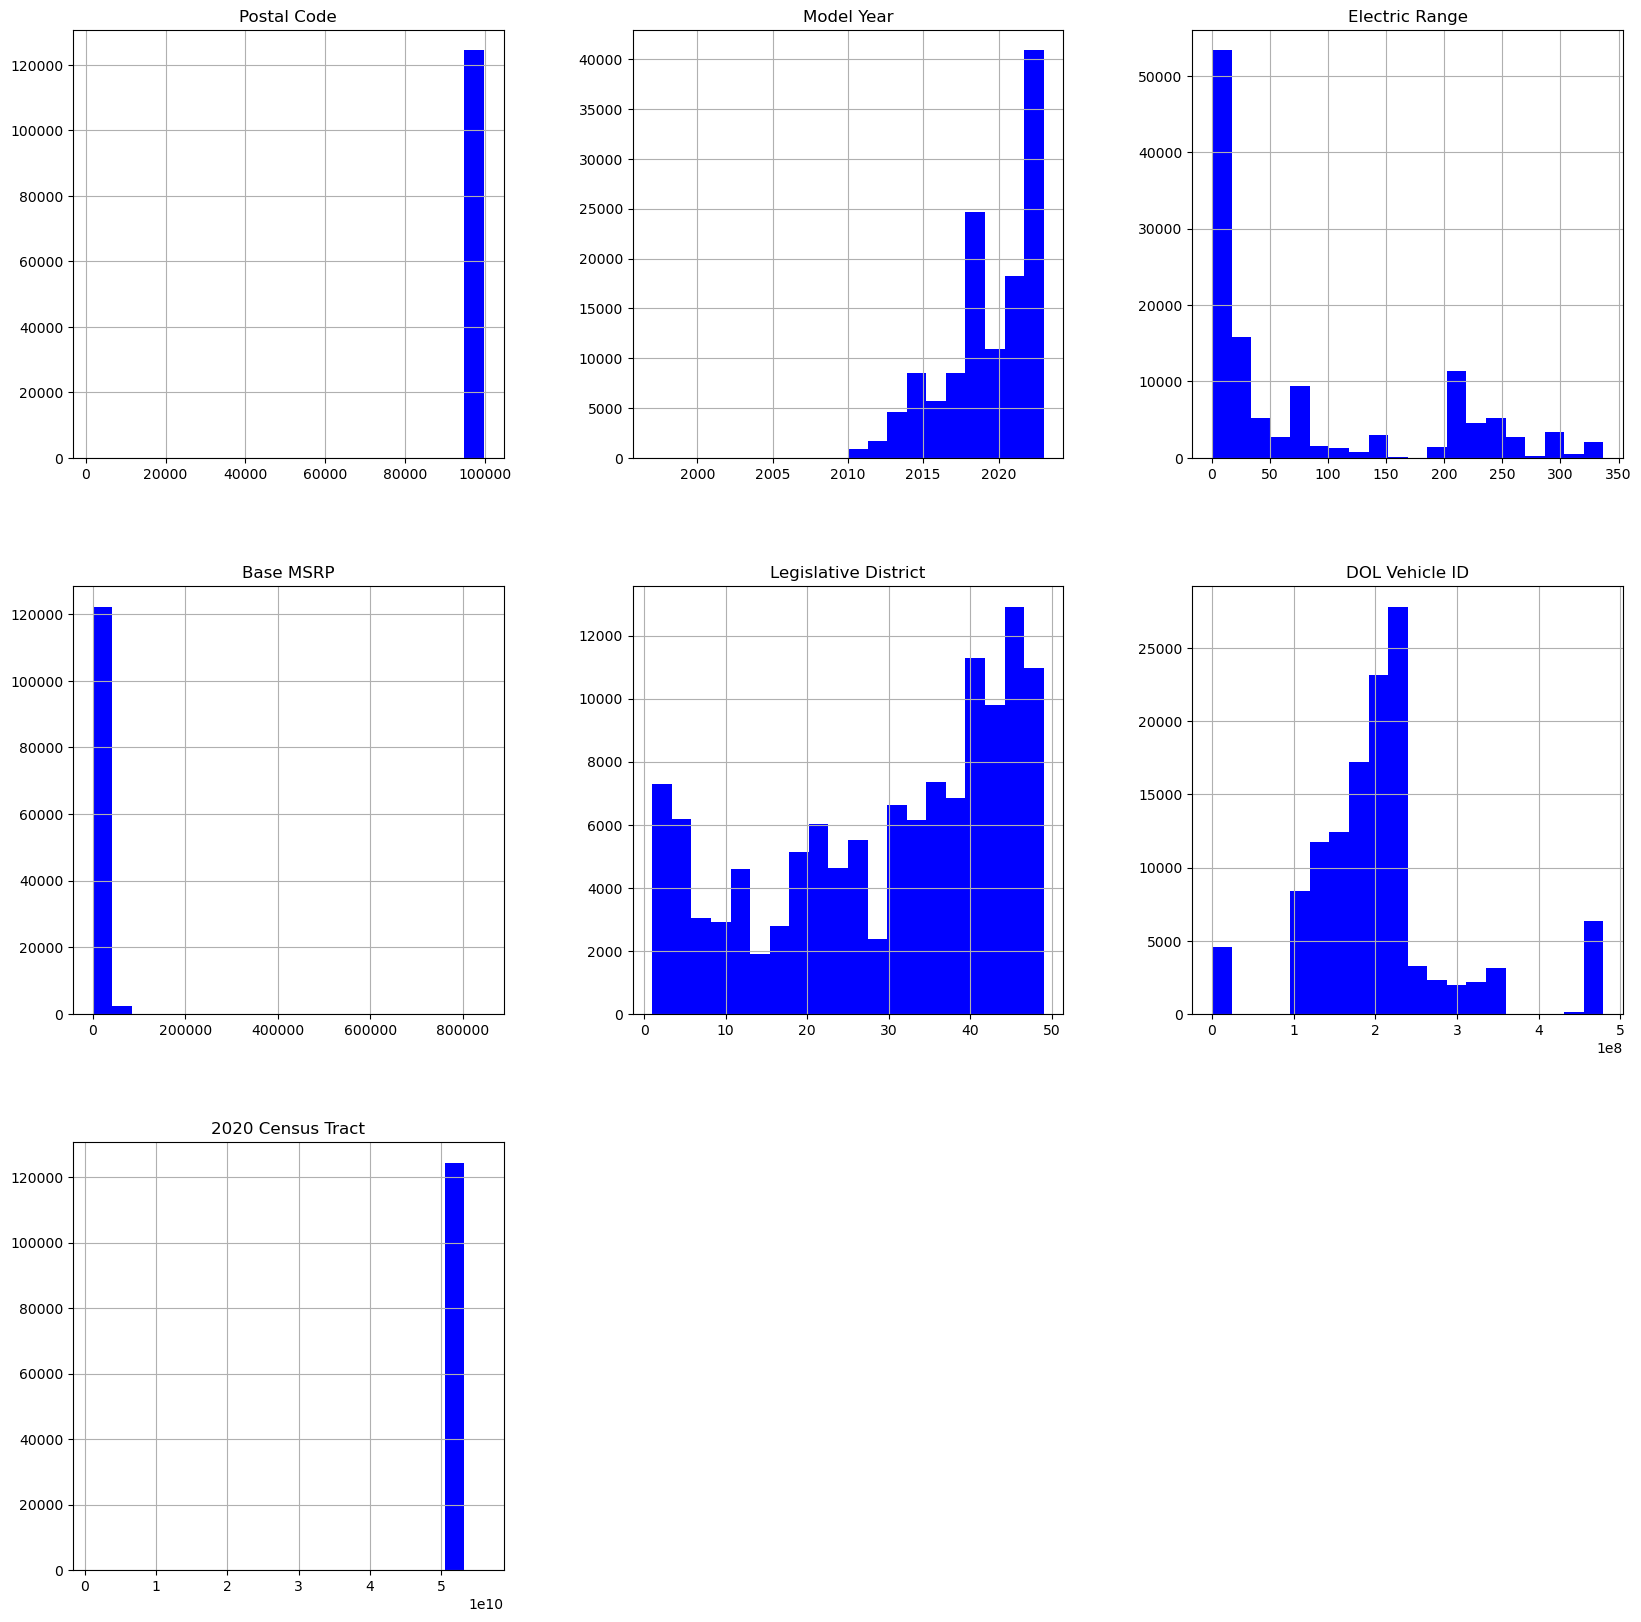

In [8]:
#histogram.
df.hist(bins = 20, figsize= (20,20), color = 'b')

In [9]:
#Distingush columns data type to numeric as 'num' and categorical as 'cat'
def utils_recognize_type(dtf, col, max_cat=50):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

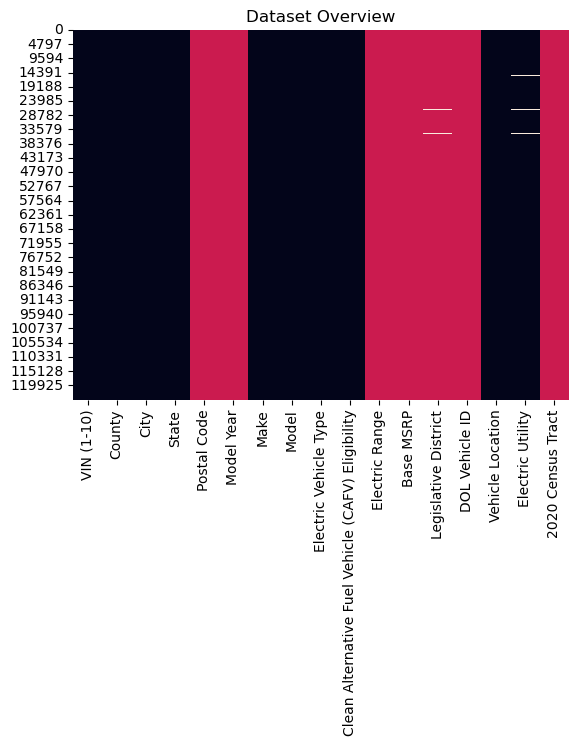

 Categerocial   Numeric   NaN- Missing values 


In [10]:
#Visualize the dataset's data type (categorical vs numerical) and missing values via heatmap
dic_cols = {col:utils_recognize_type(df, col, max_cat=20) for col in df.columns}
heatmap = df.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN- Missing values ")

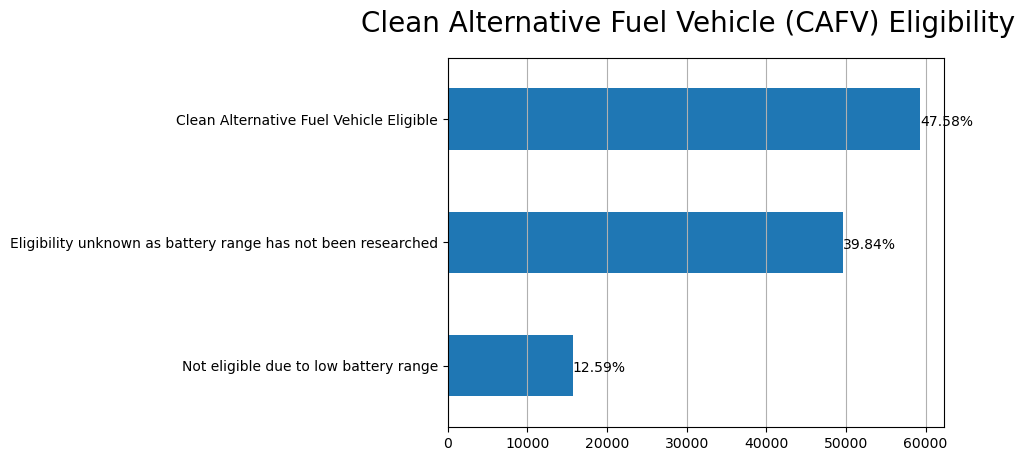

In [11]:
# Identify how many ev cars are passed CAFV test.
y = 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'
ax = df[y].value_counts().sort_values().plot(kind='barh')
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis='x')
plt.suptitle(y, fontsize=20)
plt.show()

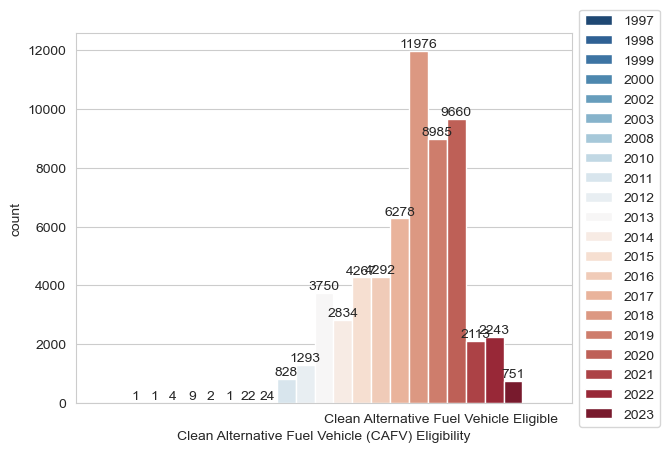

In [12]:
#Identify how many cars are passing CAFV eligibility test every year.
sns.set_style('whitegrid')
pass_df = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible']
ax = sns.countplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', hue='Model Year', data=pass_df, palette='RdBu_r')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom')

ax.set_xticklabels(ax.get_xticklabels(), ha='left')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

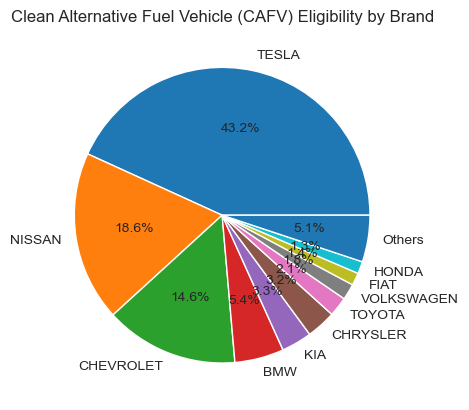

In [13]:
#the proportion of vehicles that passed the CAFV eligibility test per car brand.

brand_counts = pass_df['Make'].value_counts()

# Combine the counts of the brands that has lower numbers into an "Other" category
other_count = brand_counts[10:].sum()
brand_counts = brand_counts[:10]
brand_counts['Others'] = other_count

plt.pie(brand_counts.values, labels=brand_counts.index, autopct='%1.1f%%')
plt.title('Clean Alternative Fuel Vehicle (CAFV) Eligibility by Brand')
plt.show()


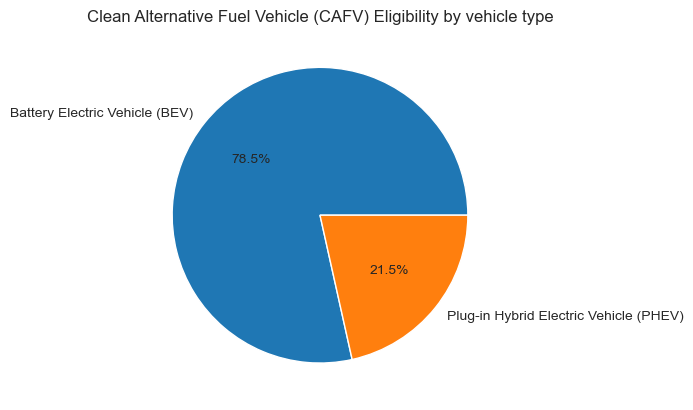

In [14]:
#  the proportion of each vehicle type that passed the CAFV test
ev_types = pass_df['Electric Vehicle Type'].value_counts()

plt.pie(ev_types.values, labels=ev_types.index, autopct='%1.1f%%')
plt.title('Clean Alternative Fuel Vehicle (CAFV) Eligibility by vehicle type')
plt.show()

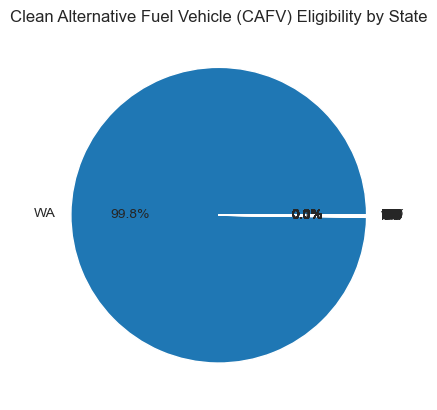

In [15]:
# Identify proportion of each states when it passed CAFV test.
state_distribution = pass_df['State'].value_counts()

plt.pie(state_distribution.values, labels= state_distribution.index, autopct='%1.1f%%')
plt.title('Clean Alternative Fuel Vehicle (CAFV) Eligibility by State')
plt.show()

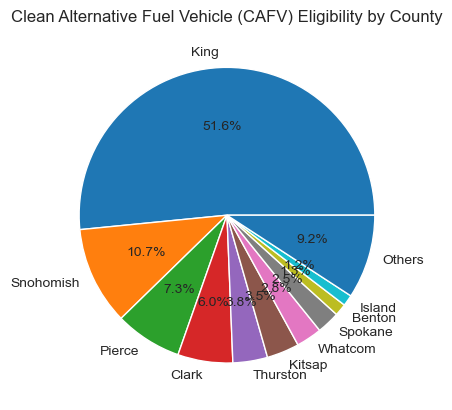

In [16]:
#Identify distribution of county, only for the vehicle that passed CAFV test.
County_counts = pass_df['County'].value_counts()

# Combine the counts of the bottom brands into an "Other" category
other_count = County_counts[10:].sum()
County_counts = County_counts[:10]
County_counts['Others'] = other_count

plt.pie(County_counts.values, labels=County_counts.index, autopct='%1.1f%%')
plt.title('Clean Alternative Fuel Vehicle (CAFV) Eligibility by County')
plt.show()

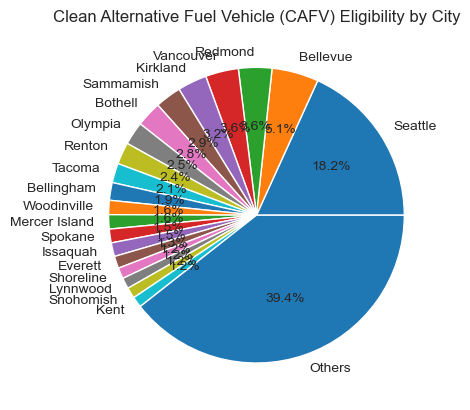

In [17]:
#Identify distribution of city, only for the vehicle that passed CAFV test.
city_counts = pass_df['City'].value_counts()

# Combine the counts of the bottom brands into an "Other" category
other_count = city_counts[20:].sum()
city_counts = city_counts[:20]
city_counts['Others'] = other_count

plt.pie(city_counts.values, labels=city_counts.index, autopct='%1.1f%%')
plt.title('Clean Alternative Fuel Vehicle (CAFV) Eligibility by City')
plt.show()

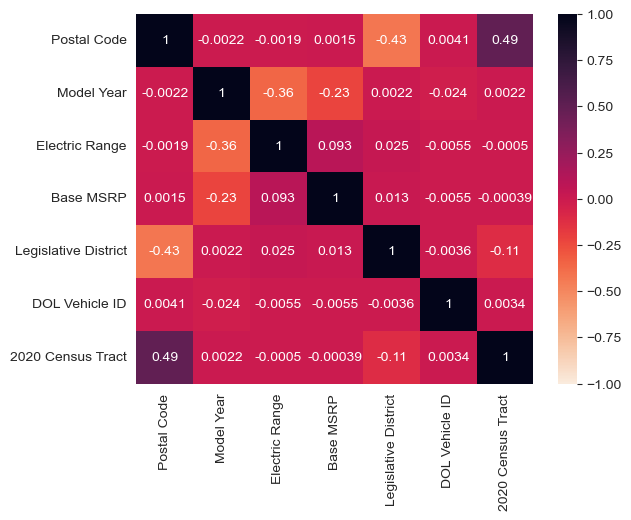

In [18]:
# Identify the correlation coefficients between features  
sns.heatmap(df.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

# 3. data preprocessing

## 3.1 Data cleansing

###  1) Feature selection (1)

In [19]:
#1) Drop the state columns as 99% are in WA. no meaningful variation in data.
#2) Drop the columns which has duplication of information- We will keep only one column [County] related to locational information
df.drop(['State','City'], axis=1 , inplace = True)

In [20]:
#3) Drop the columns which are irrelevant to research - as these are more related to external stakeholder and influence.
df.drop (['Legislative District','2020 Census Tract','Electric Utility'], axis=1 , inplace= True)

### 2) Drop the columns considering GDPR, duplication and irrelvance from research. 

In [21]:
#drop the columns 
#1) that contain personal identifiable informations - VIN,DOL Vehicle ID, vehicle location
df.drop(['VIN (1-10)','Postal Code','Vehicle Location','DOL Vehicle ID'], axis=1 , inplace=True)

## 3) drop the model column

In [22]:
# (1) For Model column-> Drop the feature 
df.drop (['Model'], axis=1 , inplace= True)

In [23]:
# Confirm if the dataset is now excluding above columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124716 entries, 0 to 124715
Data columns (total 7 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   County                                             124714 non-null  object
 1   Model Year                                         124716 non-null  int64 
 2   Make                                               124716 non-null  object
 3   Electric Vehicle Type                              124716 non-null  object
 4   Clean Alternative Fuel Vehicle (CAFV) Eligibility  124716 non-null  object
 5   Electric Range                                     124716 non-null  int64 
 6   Base MSRP                                          124716 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 6.7+ MB


In [24]:
df.isna().sum()

County                                               2
Model Year                                           0
Make                                                 0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
dtype: int64

### 2) missing values

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124716 entries, 0 to 124715
Data columns (total 7 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   County                                             124714 non-null  object
 1   Model Year                                         124716 non-null  int64 
 2   Make                                               124716 non-null  object
 3   Electric Vehicle Type                              124716 non-null  object
 4   Clean Alternative Fuel Vehicle (CAFV) Eligibility  124716 non-null  object
 5   Electric Range                                     124716 non-null  int64 
 6   Base MSRP                                          124716 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 6.7+ MB


In [26]:
# Identify if dataset has missing  value in feature- County.
df.isna().sum()

County                                               2
Model Year                                           0
Make                                                 0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
dtype: int64

In [27]:
#Imputing the missing value - two missing values in 'County' column. fills it with the most frequent value.
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy= 'most_frequent')
df_county = df['County'].values.reshape(-1,1) # covert the 'County' column into a 2d array for avoiding error.
imputed_county = imp.fit_transform(df_county)

df['County'] = imputed_county

# Confirm if the missing values have been filled.
print(df['County'].isnull().sum())


0


In [28]:
df.isna().sum()

County                                               0
Model Year                                           0
Make                                                 0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
dtype: int64

### 3) Drop the unclear result- 'Eligibility unknown as battery range has not been researched' from CAFV result


In [29]:
df.drop(df[df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == 'Eligibility unknown as battery range has not been researched'].index, axis=0, inplace=True)

In [30]:
df.info()
#the data shows that 49,687 data that has CAFV eligibility result is 'unknown'. These are removed from the dataset. 
#Therefore, only eligible and non-eligible values are remained for result of CAFV which will be used as y variable (dependent variable) in our test.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75031 entries, 0 to 124715
Data columns (total 7 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   County                                             75031 non-null  object
 1   Model Year                                         75031 non-null  int64 
 2   Make                                               75031 non-null  object
 3   Electric Vehicle Type                              75031 non-null  object
 4   Clean Alternative Fuel Vehicle (CAFV) Eligibility  75031 non-null  object
 5   Electric Range                                     75031 non-null  int64 
 6   Base MSRP                                          75031 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 4.6+ MB


In [31]:
print(df.isnull().sum())

County                                               0
Model Year                                           0
Make                                                 0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
dtype: int64


In [32]:
df.head()

,County,Model Year,Make,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
0,Yakima,2020,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0
1,San Diego,2019,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0
2,Lane,2021,VOLVO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0
3,Yakima,2019,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0
4,Snohomish,2017,BMW,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0


In [33]:
df.tail()

,County,Model Year,Make,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
124707,Grant,2022,JEEP,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0
124708,King,2016,BMW,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,72,0
124712,Pierce,2020,KIA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0
124714,Pierce,2018,CHEVROLET,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0
124715,Benton,2015,CHEVROLET,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0


## 3.2 Feature engineering / Feature extraction

## feature selection (2)

In [34]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


df_pred = df.drop(['Clean Alternative Fuel Vehicle (CAFV) Eligibility'], axis =1) # drop CAFV eligibility as it is what we wish to predict. 
X = df_pred.select_dtypes(exclude =['object']) # exclude categorical variables. 
y = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']


In [35]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
rfe.fit(X, y)

for i in range(X.shape[1]):
    print('Column: %s, Selected = %s, Rank = %d' % (X.columns[i], rfe.support_[i], rfe.ranking_[i]))


Column: Model Year, Selected = True, Rank = 1
Column: Electric Range, Selected = True, Rank = 1
Column: Base MSRP, Selected = True, Rank = 1


In [36]:
# According to above result, the dataset will use all numerical features. 

## encoding the categorical data.

In [37]:
# Encoding categorical variables using binary encoding

from sklearn.preprocessing import LabelBinarizer

In [38]:
# Reset the index of the original dataframe
df.reset_index(drop=True, inplace=True)

# Create a new dataframe to hold the encoded values
data_encoded = df.copy()
# List the categorical columns which needs to be encoded and define this list as 'col_encode'
col_encode = ['Make', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']

# Perform binary encoding for categorical columns
for col in col_encode:
    lb = LabelBinarizer()
    lb_results = lb.fit_transform(df[col])
    lb_results_df = pd.DataFrame(lb_results, columns=[col+'_'+str(i) for i in range(lb_results.shape[1])])
    data_encoded = pd.concat([data_encoded, lb_results_df], axis=1)

In [39]:
# Drop the original categorical columns
data_encoded.drop(col_encode, axis=1, inplace=True)

In [40]:
# Save the encoded data to a new file
data_encoded.to_csv('ev_data_encoded.csv', index=False)

In [41]:
# Open the new file and confirm if the data is encoded as expected.
df1= pd.read_csv('ev_data_encoded.csv')
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75031 entries, 0 to 75030
Data columns (total 38 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   County                                               75031 non-null  object
 1   Model Year                                           75031 non-null  int64 
 2   Electric Range                                       75031 non-null  int64 
 3   Base MSRP                                            75031 non-null  int64 
 4   Make_0                                               75031 non-null  int64 
 5   Make_1                                               75031 non-null  int64 
 6   Make_2                                               75031 non-null  int64 
 7   Make_3                                               75031 non-null  int64 
 8   Make_4                                               75031 non-null  int64 


In [42]:
#Confirm the missing value to make sure there is no missing value in the dataset.
print(df1.isnull().sum())

County                                                 0
Model Year                                             0
Electric Range                                         0
Base MSRP                                              0
Make_0                                                 0
Make_1                                                 0
Make_2                                                 0
Make_3                                                 0
Make_4                                                 0
Make_5                                                 0
Make_6                                                 0
Make_7                                                 0
Make_8                                                 0
Make_9                                                 0
Make_10                                                0
Make_11                                                0
Make_12                                                0
Make_13                        

# Scaling data to make normal distribution form.

In [43]:
# Import library
from sklearn.preprocessing import StandardScaler

# Load dataset
df1 = pd.read_csv('ev_data_encoded.csv')

# Separate numerical and categorical columns
num_cols = ['Model Year', 'Electric Range','Base MSRP']
cat_cols = ['Electric Vehicle Type_0', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility_0','Make_0','Make_1','Make_2',
            'Make_3','Make_4','Make_5', 'Make_6','Make_7','Make_8','Make_9','Make_10','Make_11','Make_12','Make_13',                                              
            'Make_14','Make_15','Make_16','Make_17','Make_18','Make_19','Make_20','Make_21','Make_22','Make_23','Make_24',
            'Make_25','Make_26','Make_27','Make_28','Make_29','Make_30','Make_31']
            
# Create separate dataframes for numerical and categorical columns
num_df = df1[num_cols]
cat_df = df1[cat_cols]

# scale numerical columns with StandardScaler
scaler = StandardScaler()
scaled_num_df = pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns)

# merge scaled numerical and categorical dataframes
df2 = pd.concat([scaled_num_df, cat_df], axis=1)


In [44]:
#PCA
from sklearn.decomposition import PCA

# Create new feature matrix which excludes target variable- Clean Alternative Fuel Vehicle (CAFV) Eligibility_0
X= df2.drop(['Clean Alternative Fuel Vehicle (CAFV) Eligibility_0'], axis=1)

pca= PCA(n_components= 3)
pca_result= pca.fit(X)
print(pca.explained_variance_ratio_)

[0.34041469 0.29040077 0.19888747]


In [45]:
#Create new dataframe reflecting PCA result.

trans= pca.transform(X)

# As PCA 1, PCA 2, PCA 3 explained about 82% of total variance (0.34041469 + 0.29040077 + 0.19888747), only includes these three.
trans = trans[:, :3] 
pca_columns = ['PCA1', 'PCA2', 'PCA3'] 
pca_df = pd.DataFrame(trans, columns= pca_columns) 

# Add target variable= CAFV Eligibility_0 in to new data frame.
pca_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility_0'] = df2['Clean Alternative Fuel Vehicle (CAFV) Eligibility_0'] 


In [46]:
#Confirm the new dataset 'pca_df'
pca_df.head()

,PCA1,PCA2,PCA3,Clean Alternative Fuel Vehicle (CAFV) Eligibility_0
0,-2.225973,0.134953,0.017993,0
1,-1.255280,0.035172,-0.052265,0
2,0.589627,-1.371649,1.035783,1
3,-1.803975,0.247205,-0.169112,0
4,1.315930,-0.557480,0.101727,1


# 5. Model selection

# 5.1 Split the dataset to train and test set.

In [47]:
#Split the dataset to train and test set. Fistly import the library.
from sklearn.model_selection import train_test_split


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_df.iloc[:, :-1], pca_df.iloc[:, -1], test_size=0.3, random_state=101)

# Print the shapes of the training and testing sets
print("Training set shape: ", X_train.shape)
print("Testing set shape: ", X_test.shape)


Training set shape:  (52521, 3)
Testing set shape:  (22510, 3)


## 5.2 Model 1- Logistic Regression model 

In [48]:
# Train the model with logistic Regression in python
from sklearn import linear_model
lr = linear_model.LogisticRegression(max_iter= 5000) 
# Increase iterations from default one to 5000 in order to avoid error.
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [49]:
#Make a prediction 
predictions = lr.predict(X_test)

In [50]:
# Evaluate performance with F1- score, AUC, accuracy score, precision, and recall score.
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,f1_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(y_test, predictions, lr.predict_proba(X_test)[:, 1])

Accuracy: 0.9749, Precision: 0.9181, Recall: 0.9660,    F1: 0.9415, AUC:0.9987


In [51]:
#Identify possible overfitting by cross val score 
from sklearn.model_selection import cross_val_score

# Train the logistic regression model
lr = linear_model.LogisticRegression(max_iter=5000) 

# Perform cross validation using the logistic regression model
scores = cross_val_score(lr, pca_df.iloc[:, :-1], pca_df.iloc[:, -1],scoring= 'accuracy', cv=10)

# Print the mean and standard deviation of the scores
print("Mean score: ", scores.mean())
print("Standard deviation: ", scores.std())

Mean score:  0.9753035388545361
Standard deviation:  0.001131047504921145


## 5.2 Model 2. XGBoost

In [52]:
#XGBoost 

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,f1_score

# Split the dataset to train and test set.
X_train, X_test, y_train, y_test = train_test_split(pca_df.iloc[:, :-1], pca_df.iloc[:, -1], test_size=0.3, random_state=101)

# train the model
model = xgb.XGBClassifier()
model.fit(X_train,y_train)

#Make prediction
y_pred = model.predict(X_test)

#Evaluation
get_clf_eval(y_test, y_pred,model.predict_proba(X_test)[:, 1])


Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000,    F1: 1.0000, AUC:1.0000


In [53]:
#Identify possible overfitting by cross val score 
from sklearn.model_selection import cross_val_score

# Train the XGB  model
model = xgb.XGBClassifier()

# Perform cross validation
scores = cross_val_score(model, pca_df.iloc[:, :-1], pca_df.iloc[:, -1],scoring= 'accuracy', cv=10)

# Print the mean and standard deviation of the scores
print("Mean score: ", scores.mean())
print("Standard deviation: ", scores.std())


Mean score:  0.9999866719978675
Standard deviation:  3.9984006397453255e-05


## 5. Model 3 - Voting classifier (ensemble mothod)

In [54]:
# Import relevant libraries.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

# Split the dataset to train and test set.
X_train, X_test, y_train, y_test = train_test_split(pca_df.iloc[:, :-1], pca_df.iloc[:, -1], test_size=0.3, random_state=101)
# Train the model with voting classifier (soft voting)

knn_clf = KNeighborsClassifier()
vo_clf = VotingClassifier(estimators=[('LR',lr),('KNN',knn_clf)], voting ='soft')
vo_clf.fit(X_train, y_train)

# Prediction and evaluation
preediction = vo_clf.predict(X_test)
get_clf_eval(y_test, predictions, vo_clf.predict_proba(X_test)[:, 1])


Accuracy: 0.9749, Precision: 0.9181, Recall: 0.9660,    F1: 0.9415, AUC:1.0000


In [55]:
#Identify possible overfitting by cross val score 
from sklearn.model_selection import cross_val_score

# Train the voting classifier model
vo_clf = VotingClassifier(estimators=[('LR',lr),('KNN',knn_clf)], voting ='soft')

# Perform cross validation
scores = cross_val_score(vo_clf, pca_df.iloc[:, :-1], pca_df.iloc[:, -1],scoring= 'accuracy', cv=10)

# Print the mean and standard deviation of the scores
print("Mean score: ", scores.mean())
print("Standard deviation: ", scores.std())

Mean score:  1.0
Standard deviation:  0.0


# 6. Hyper parameter optimization

In [57]:
#xgb model hyperparameter optimization.
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Make variations for the parameters
params = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 150]
}
model = xgb.XGBClassifier()

# Fit the GridSearchCV to the training data
grid_search = GridSearchCV(model, params, cv=3,scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [58]:
#Identify the best paramater and estimator
print("best_parameter:",best_params)
print("best_estimator:",best_estimator)

best_parameter: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150}
best_estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


# 7. Model evaluation and comparision

In [59]:
#XGBoost with best parameter.

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,f1_score

# Split the dataset to train and test set.
X_train, X_test, y_train, y_test = train_test_split(pca_df.iloc[:, :-1], pca_df.iloc[:, -1], test_size=0.3, random_state=101)

# train the model
model = xgb.XGBClassifier(learning_rate=0.2, max_depth=4, n_estimators=150)
model.fit(X_train,y_train)

#Make prediction
y_pred = model.predict(X_test)
#Evaluation
get_clf_eval(y_test,y_pred,model.predict_proba(X_test)[:, 1])

Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000,    F1: 1.0000, AUC:1.0000


In [60]:
#Identify possible overfitting by cross val score 
from sklearn.model_selection import cross_val_score

# Train the xgb model
model = xgb.XGBClassifier(learning_rate=0.2, max_depth=4, n_estimators=150)

# Perform cross validation using the xgb model
scores = cross_val_score(model, pca_df.iloc[:, :-1], pca_df.iloc[:, -1],scoring= 'accuracy', cv=10)

# Print the mean and standard deviation of the scores
print("Mean score: ", scores.mean())
print("Standard deviation: ", scores.std())


Mean score:  1.0
Standard deviation:  0.0
